# DESI Analysis Dissertation

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.simplefilter(action='ignore') 

import geopandas as gpd

# Importing and Organizing Data

Downloading datasets.

In [2]:
# Defining the url
url = './DESI_Datasets/'

online_orders = pd.read_excel(url + 'enterprises_online_orders.xlsx', sheet_name='Sheet 1', decimal=',')
software_sol = pd.read_excel(url + 'enterprises_software_solutions.xlsx', sheet_name='Sheet 1', decimal=',')
digital_skills = pd.read_excel(url + 'individual_skills.xlsx', sheet_name='Sheet 1', decimal=',')
pa_interaction = pd.read_excel(url + 'indviduals_using_internet_for_interaction_with_pa.xlsx', sheet_name='Sheet 1', decimal=',')
internet_access = pd.read_excel(url + 'level_of_internet_access_households.xlsx', sheet_name='Sheet 1', decimal=',')
turnover_pct = pd.read_excel(url + 'share_of_enterprises_turnover_on_ecommerce.xlsx', sheet_name='Sheet 1', decimal=',') 
web_access_public_info = pd.read_excel(url + 'users_accessing_web_for_public_info.xlsx', sheet_name='Sheet 1', decimal=',')

Merging datasets into a single one.

In [3]:
complete_df = online_orders.merge(software_sol, on='Countries')
complete_df = complete_df.merge(digital_skills, on='Countries')
complete_df = complete_df.merge(pa_interaction, on='Countries')
complete_df = complete_df.merge(internet_access, on='Countries')
complete_df = complete_df.merge(turnover_pct, on='Countries')
complete_df = complete_df.merge(web_access_public_info, on='Countries')

Checking the output.

In [4]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Countries                   44 non-null     object
 1   Online_Orders               43 non-null     object
 2   Software_Solutions          43 non-null     object
 3   Individual_Digital_Skills   43 non-null     object
 4   PA_Interaction              43 non-null     object
 5   Households_Internet_Access  43 non-null     object
 6   Turnover_Pct                43 non-null     object
 7   Web_Access_For_Public_Info  43 non-null     object
dtypes: object(8)
memory usage: 2.9+ KB


At the beginning it is necessary to remove all those Countries that are not considered into DESI report.  

Those are: Austria, Belgium, Bulgaria, Croatia, Cyprus, Czechia, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Ireland, Italy, Latvia, Lithuania, Luxembourg,  Malta, Netherland, Poland, Portugal, Romania, Slovakia, Slovenia, Spain, Sweden.  
So, all the 27 Member States are included, plus the European Union.

Selecting only the necessary countries.

In [5]:
complete_df.Countries.unique()

array(['European Union - 27 countries (from 2020)',
       'European Union - 28 countries (2013-2020)',
       'Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)',
       'Euro area - 19 countries  (2015-2022)', 'Belgium', 'Bulgaria',
       'Czechia', 'Denmark',
       'Germany (until 1990 former territory of the FRG)', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland',
       'Liechtenstein', 'Norway', 'Switzerland', 'United Kingdom',
       'Montenegro', 'North Macedonia', 'Albania', 'Serbia', 'Türkiye',
       'Bosnia and Herzegovina', nan, 'Special value', ':'], dtype=object)

In [6]:
complete_df = complete_df.set_index('Countries').drop(index=[
   'European Union - 28 countries (2013-2020)',
   'Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)',
   'Euro area - 19 countries  (2015-2022)',
   'Iceland',
    'Liechtenstein', 'Norway', 'Switzerland', 'United Kingdom',
   'Montenegro', 'North Macedonia', 'Albania', 'Serbia', 'Türkiye','Bosnia and Herzegovina', 'Special value', ':', np.nan
]).reset_index()

Checking the result.

In [7]:
complete_df.head()

,Countries,Online_Orders,Software_Solutions,Individual_Digital_Skills,PA_Interaction,Households_Internet_Access,Turnover_Pct,Web_Access_For_Public_Info
0,European Union - 27 countries (from 2020),19,19.5,53.92,58.5,92.31,19.8,47.39
1,Belgium,30.6,25.7,54.23,69.62,92.3,28.2,58.55
2,Bulgaria,10.5,11.2,31.18,26.6,83.53,6.2,19.13
3,Czechia,24.5,11.5,59.69,68.24,89.31,30,57.94
4,Denmark,38.3,25.8,68.65,92.25,96.14,28,90.6


In [8]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Countries                   28 non-null     object
 1   Online_Orders               28 non-null     object
 2   Software_Solutions          28 non-null     object
 3   Individual_Digital_Skills   28 non-null     object
 4   PA_Interaction              28 non-null     object
 5   Households_Internet_Access  28 non-null     object
 6   Turnover_Pct                28 non-null     object
 7   Web_Access_For_Public_Info  28 non-null     object
dtypes: object(8)
memory usage: 1.9+ KB


There are all the 28 Countries included in the DESI 2022.  
Now, in order to obtain a better framework, it is necessary to import some general statistics not related to the DESI dimensions.

In [9]:
second_url = './General Data/'

gdp_per_capita = pd.read_excel(second_url + 'gdp_per_capita_at_market_prices.xlsx', sheet_name='Sheet 1', decimal=',')
labor_cost = pd.read_excel(second_url + 'labour_costs_annual_data.xlsx', sheet_name='Sheet 1', decimal=',')
labor_productivity = pd.read_excel(second_url + 'nominal_labour_productivity_per_person_employed.xlsx', sheet_name='Sheet 1', decimal=',')
non_formal_edu = pd.read_excel(second_url + 'participation_rate_in_non_formal_education.xlsx', sheet_name='Sheet 1', decimal=',')
pop_over65 = pd.read_excel(second_url + 'proportion_of_population_aged_65_and_over.xlsx', sheet_name='Sheet 1', decimal=',')
tertiary_edu = pd.read_excel(second_url + 'tertiary_education_attainment.xlsx', sheet_name='Sheet 1', decimal=',')
total_unemp = pd.read_excel(second_url + 'total_unemployment_rate.xlsx', sheet_name='Sheet 1', decimal=',')

In [10]:
general_data = gdp_per_capita.merge(labor_cost, on='Countries')
general_data = general_data.merge(labor_productivity, on='Countries')
general_data = general_data.merge(non_formal_edu, on='Countries')
general_data = general_data.merge(pop_over65, on='Countries')
general_data = general_data.merge(tertiary_edu, on='Countries')
general_data = general_data.merge(total_unemp, on='Countries')

Checking the result.

In [11]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Countries                   40 non-null     object
 1   GDP_Per_Capita              38 non-null     object
 2   Annual_Labor_Cost           38 non-null     object
 3   Nominal_Labor_Productivity  38 non-null     object
 4   Non_Formal_Edu_Part         38 non-null     object
 5   Population_Over65_Pct       38 non-null     object
 6   Tertiary_Edu_Attainment     38 non-null     object
 7   Total_Unemployment          38 non-null     object
dtypes: object(8)
memory usage: 2.7+ KB


Now, it is necessary to merge the first dataframe with the second one.

In [12]:
final_df = complete_df.merge(general_data, on='Countries')

In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Countries                   28 non-null     object
 1   Online_Orders               28 non-null     object
 2   Software_Solutions          28 non-null     object
 3   Individual_Digital_Skills   28 non-null     object
 4   PA_Interaction              28 non-null     object
 5   Households_Internet_Access  28 non-null     object
 6   Turnover_Pct                28 non-null     object
 7   Web_Access_For_Public_Info  28 non-null     object
 8   GDP_Per_Capita              28 non-null     object
 9   Annual_Labor_Cost           28 non-null     object
 10  Nominal_Labor_Productivity  28 non-null     object
 11  Non_Formal_Edu_Part         28 non-null     object
 12  Population_Over65_Pct       28 non-null     object
 13  Tertiary_Edu_Attainment     28 non-null     object
 

Everything looks fine, there are 17 columns (DESI datasets + general datasets + Countries) and 28 rows (Member States + EU).  
The last modifcation to perform is to change Germany and European Union's names.

Finding the two values indexes.

In [14]:
final_df[(final_df.Countries.str.contains('Germany')) | (final_df.Countries.str.contains('European'))]

,Countries,Online_Orders,Software_Solutions,Individual_Digital_Skills,PA_Interaction,Households_Internet_Access,Turnover_Pct,Web_Access_For_Public_Info,GDP_Per_Capita,Annual_Labor_Cost,Nominal_Labor_Productivity,Non_Formal_Edu_Part,Population_Over65_Pct,Tertiary_Edu_Attainment,Total_Unemployment
0,European Union - 27 countries (from 2020),19,19.5,53.92,58.5,92.31,19.8,47.39,32430,29.1,100,9,20.8,41.2,7
5,Germany (until 1990 former territory of the FRG),19.7,20,48.92,50.3,91.88,19.1,46.3,43290,37.2,104,3.3,22,35.7,3.6


Changing their names.

In [15]:
final_df.loc[0, 'Countries'] = 'European Union'
final_df.loc[5, 'Countries'] = 'Germany'

Final result.

In [16]:
final_df

,Countries,Online_Orders,Software_Solutions,Individual_Digital_Skills,PA_Interaction,Households_Internet_Access,Turnover_Pct,Web_Access_For_Public_Info,GDP_Per_Capita,Annual_Labor_Cost,Nominal_Labor_Productivity,Non_Formal_Edu_Part,Population_Over65_Pct,Tertiary_Edu_Attainment,Total_Unemployment
0,European Union,19,19.5,53.92,58.5,92.31,19.8,47.39,32430,29.1,100,9,20.8,41.2,7
1,Belgium,30.6,25.7,54.23,69.62,92.3,28.2,58.55,43330,41.6,130.7,4,19.3,50.9,6.3
2,Bulgaria,10.5,11.2,31.18,26.6,83.53,6.2,19.13,10330,7,53.5,2.6,21.7,33.6,5.3
3,Czechia,24.5,11.5,59.69,68.24,89.31,30,57.94,22270,15.3,85.6,3.5,20.2,34.9,2.8
4,Denmark,38.3,25.8,68.65,92.25,96.14,28,90.6,57520,46.9,119.3,23.2,20.1,49.7,5.1
5,Germany,19.7,20,48.92,50.3,91.88,19.1,46.3,43290,37.2,104,3.3,22,35.7,3.6
6,Estonia,18.7,14.6,56.37,81.93,91.82,15.5,68.73,23640,14.5,86.6,8.3,20.3,43.2,6.2
7,Ireland,33.6,19.4,70.49,91.2,97.5,37.9,67.4,84940,33.5,214.7,10.2,14.8,61.7,6.2
8,Greece,19.3,16.1,52.48,55,85.07,5.8,52.27,17010,17.2,66.4,27.3,22.5,44.2,14.7
9,Spain,25.8,29.4,64.16,68.71,95.92,19,56.1,25500,22.9,92.4,12.3,19.8,48.7,14.8


Now it is better to save the final dataframe to avoid making all the previous operations everytime, this will save computational time.

In [28]:
final_df.to_excel('final_dataframe_pt_2.xlsx', index=None)

# Analysis

In [2]:
eu = pd.read_excel('./final_dataframe_pt_2.xlsx')
eu.head()

,Countries,Online_Orders,Software_Solutions,Individual_Digital_Skills,PA_Interaction,Households_Internet_Access,Turnover_Pct,Web_Access_For_Public_Info,GDP_Per_Capita,Annual_Labor_Cost,Nominal_Labor_Productivity,Non_Formal_Edu_Part,Population_Over65_Pct,Tertiary_Edu_Attainment,Total_Unemployment
0,European Union,19.0,19.5,53.92,58.50,92.31,19.8,47.39,32430,29.1,100.0,9.0,20.8,41.2,7.0
1,Belgium,30.6,25.7,54.23,69.62,92.30,28.2,58.55,43330,41.6,130.7,4.0,19.3,50.9,6.3
2,Bulgaria,10.5,11.2,31.18,26.60,83.53,6.2,19.13,10330,7.0,53.5,2.6,21.7,33.6,5.3
3,Czechia,24.5,11.5,59.69,68.24,89.31,30.0,57.94,22270,15.3,85.6,3.5,20.2,34.9,2.8
4,Denmark,38.3,25.8,68.65,92.25,96.14,28.0,90.60,57520,46.9,119.3,23.2,20.1,49.7,5.1


Before starting with the analysis, it will be provided a description of the different columns.  

- **Online_Orders**: enterprises having received orders online (at least 1%) - % of enterprises. Unit of measure: percentage of enterprises.  
- **Software_Solutions**: enterprises using software solutions, like CRM to analyse information about clients for marketing purposes. Unit of measure: percentage of enterprises.  
- **Individual_Digital_Skills**: individuals who have basic or above basic overall digital skills. Unit of measure: percentage of individuals.  
- **PA_Interaction**: Individuals using the internet for interaction with public authorities. Unit of measure: percentage of individuals.  
- **Households_Internet_Access**: Level of internet access - households. Unit of measure: percentage of households.  
- **Turnover_Pct**: Share of enterprises' turnover on e-commerce - %. Unit of measure: percentage of turnover.  
- **Web_Access_For_Public_Info**: Individuals using the internet for interaction with public authorities (their website in this case). Unit of measure: percentage of individuals.  
- **GDP_Per_Capita**: Gross domestic product at market prices. Unit of measure: current prices, euro per capita.  
- **Annual_Labor_Cost**: Average hourly labor costs annual data. Unit of measure: Euro.  
- **Nominal_Labor_Productivity**: Nominal labour productivity per person employed. Unit of measure: Percentage of EU27 (from 2020) total (based on million purchasing power  standards), current prices  
- **Non_Formal_Edu_Part**: Participation rate in non-formal education and training (last 4 weeks). People from 15 to 24 years old. Unit of measure: percentage of individuals.  
- **Population_Over65_Pct**: Proportion of population aged 65 and over. Unit of measure: percentage of population.  
- **Tertiary_Edu_Attainment**: Tertiary educational attainment of people between 25-34 years old. Unit of measure: percentage of individuals.  
- **Total_Unemployment**: Total unemployment rate of people between 15-74 years old. Unit of measure: percentage of population in the labour force

In the first part will be provided a graphical representation of the first seven columns, in order to show the most virtuous Countries for each DESI indcator. 

Defining a function which returns the decreasing order of the Countries for a given statistics.

In [18]:
def order_creator(column):
    final_order = eu[['Countries', column]].sort_values(column, ascending=False).set_index('Countries').index
    return final_order

Printing all the graphs.

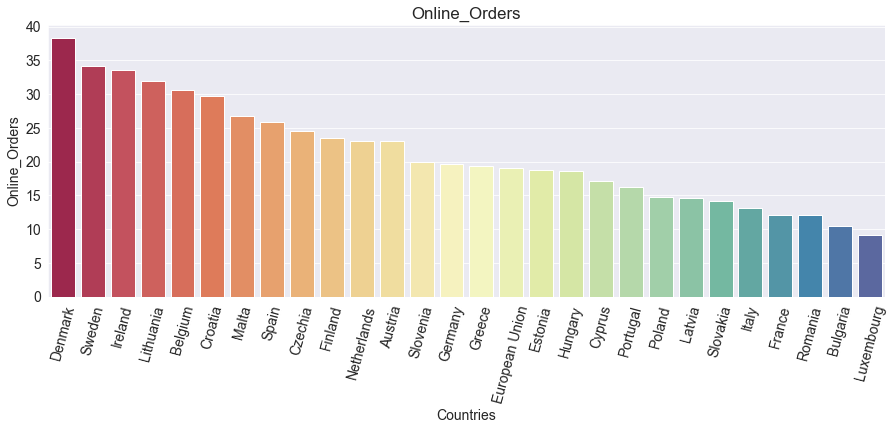

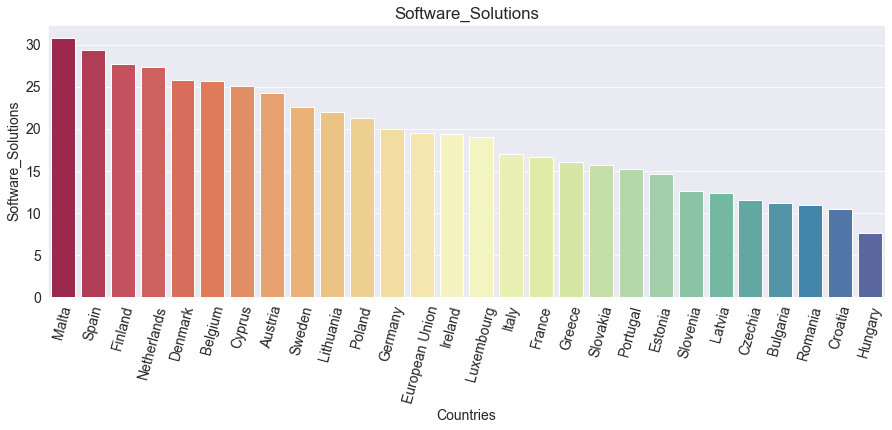

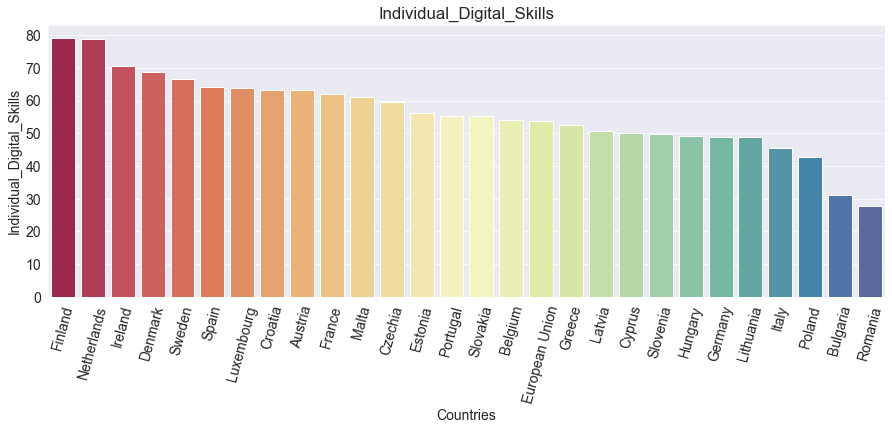

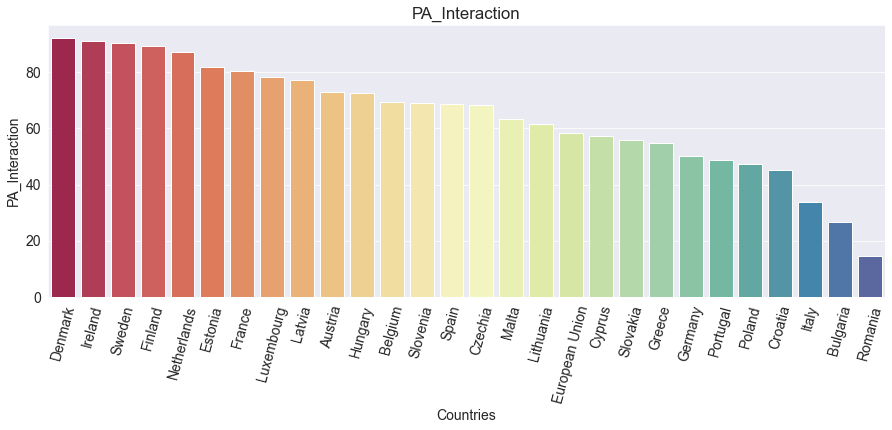

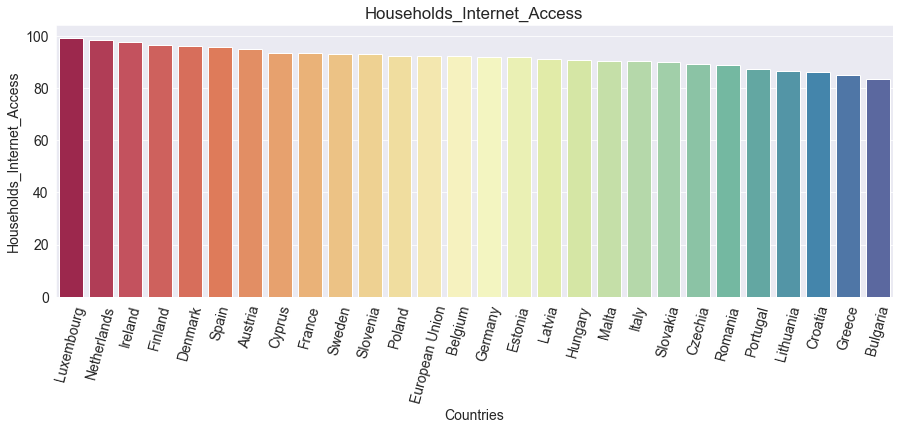

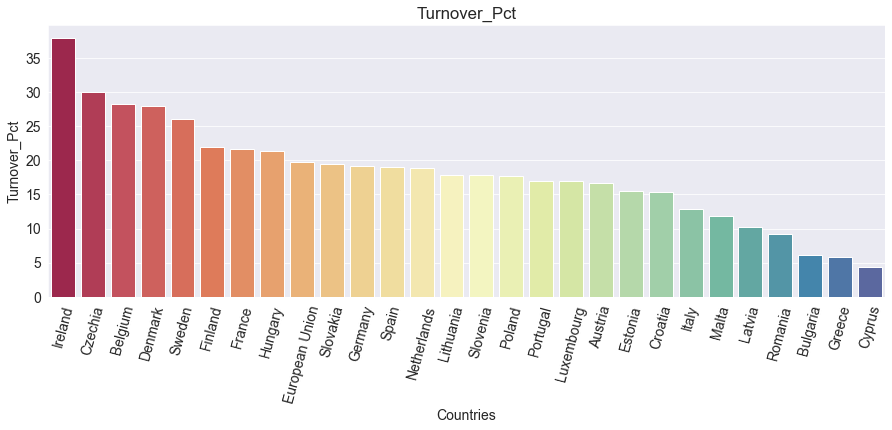

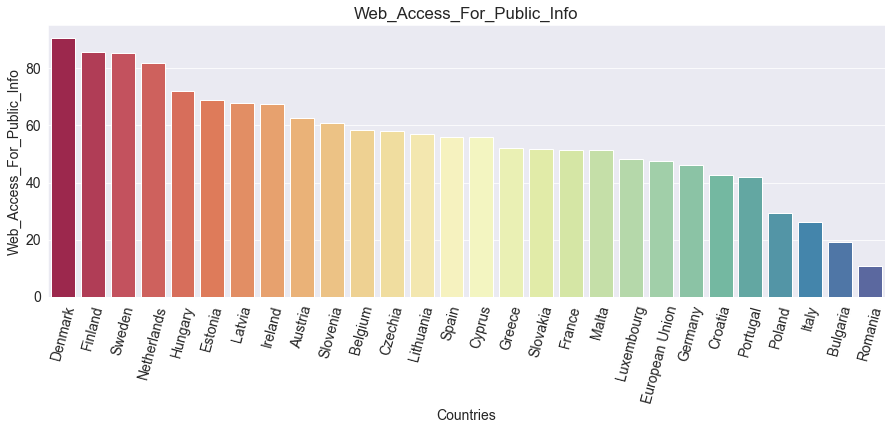

In [19]:
desi_cols = eu.loc[:, 'Online_Orders':'Web_Access_For_Public_Info'].columns.to_list()

for i in desi_cols:
    sns.barplot(data=eu, x='Countries', y=i, order=order_creator(i), palette=sns.color_palette('Spectral', len(eu)))
    plt.title(i)
    plt.xticks(rotation=75)
    plt.show()

Now, the same process is repeated for the general variables.

In [20]:
eu.head()

,Countries,Online_Orders,Software_Solutions,Individual_Digital_Skills,PA_Interaction,Households_Internet_Access,Turnover_Pct,Web_Access_For_Public_Info,GDP_Per_Capita,Annual_Labor_Cost,Nominal_Labor_Productivity,Non_Formal_Edu_Part,Population_Over65_Pct,Tertiary_Edu_Attainment,Total_Unemployment
0,European Union,19.0,19.5,53.92,58.50,92.31,19.8,47.39,32430,29.1,100.0,9.0,20.8,41.2,7.0
1,Belgium,30.6,25.7,54.23,69.62,92.30,28.2,58.55,43330,41.6,130.7,4.0,19.3,50.9,6.3
2,Bulgaria,10.5,11.2,31.18,26.60,83.53,6.2,19.13,10330,7.0,53.5,2.6,21.7,33.6,5.3
3,Czechia,24.5,11.5,59.69,68.24,89.31,30.0,57.94,22270,15.3,85.6,3.5,20.2,34.9,2.8
4,Denmark,38.3,25.8,68.65,92.25,96.14,28.0,90.60,57520,46.9,119.3,23.2,20.1,49.7,5.1


In [21]:
general_cols = eu.loc[:, 'GDP_Per_Capita':'Total_Unemployment'].columns.to_list()

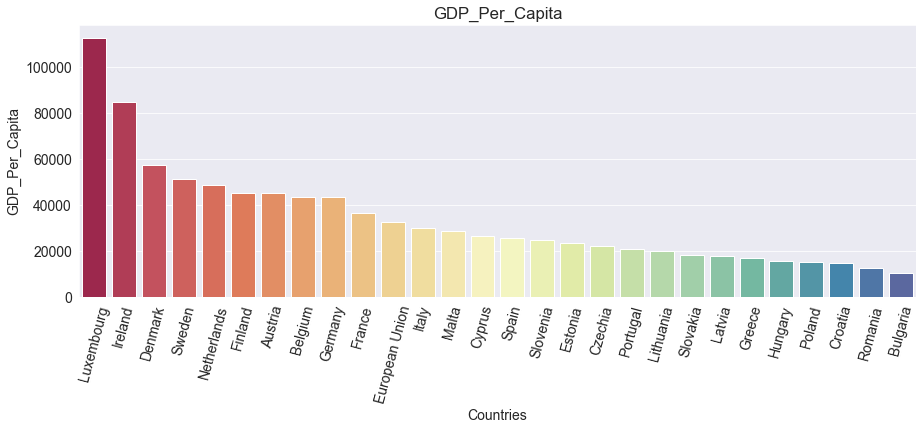

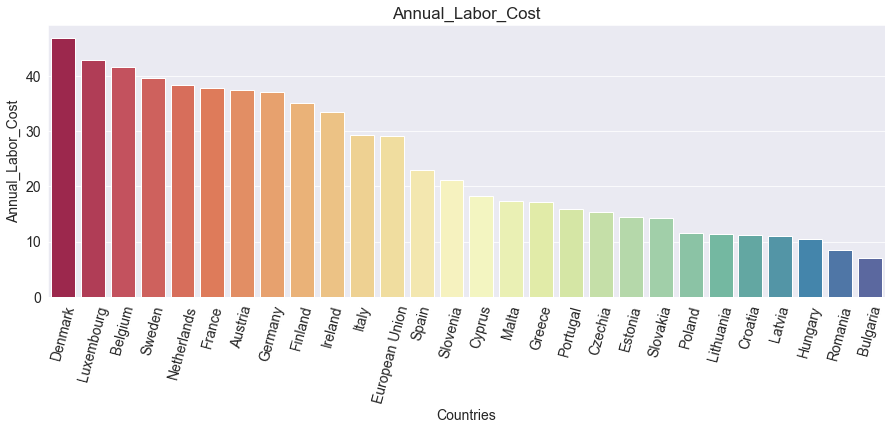

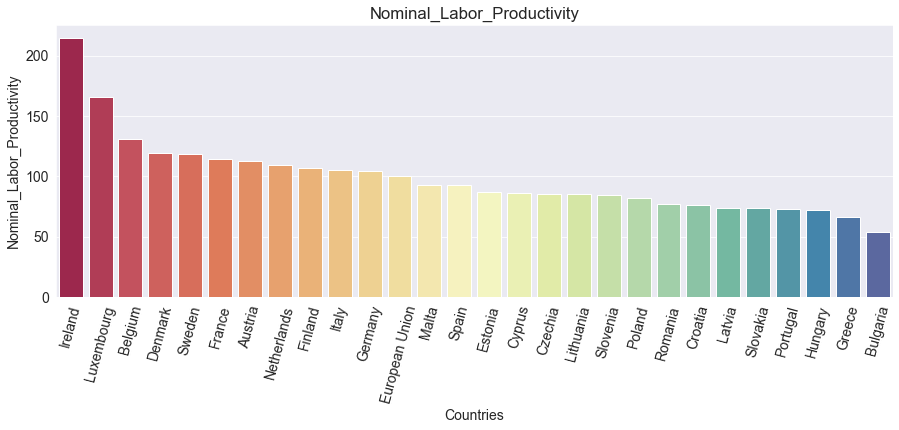

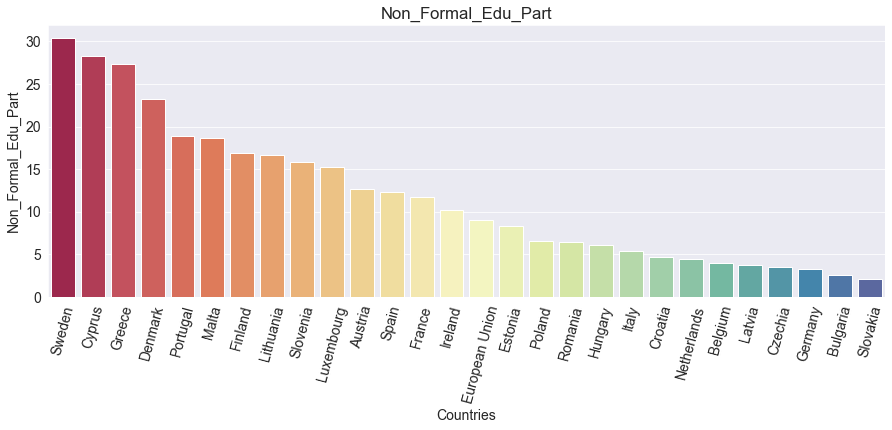

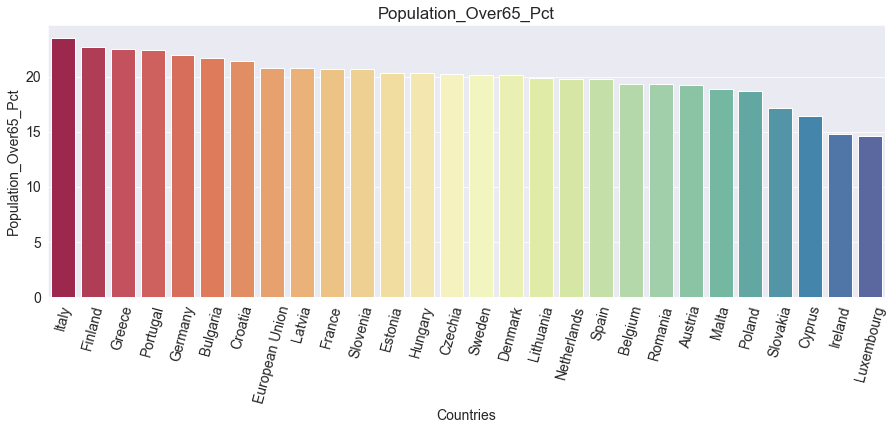

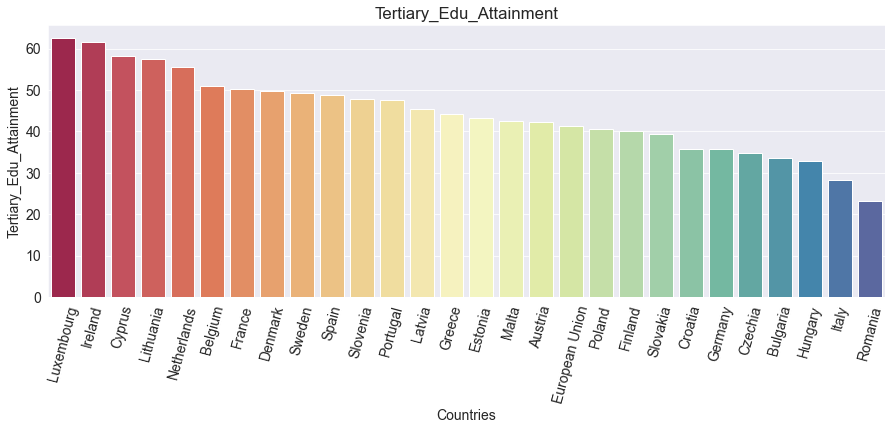

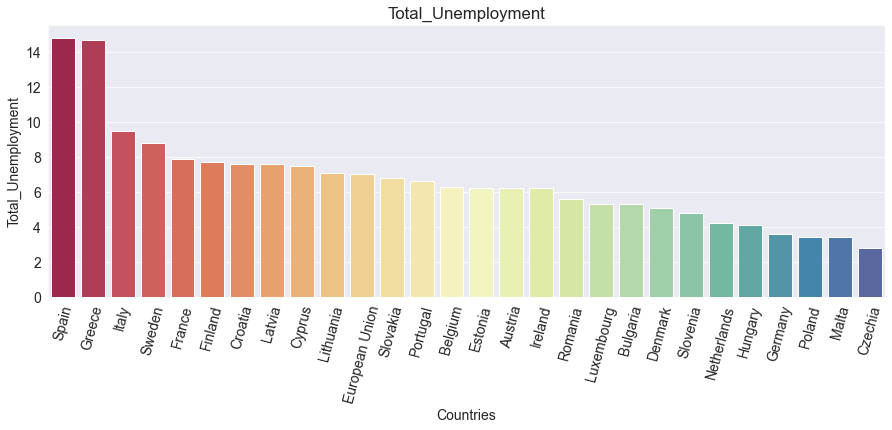

In [22]:
for i in general_cols:
    sns.barplot(data=eu, x='Countries', y=i, order=order_creator(i), palette=sns.color_palette('Spectral', len(eu)))
    plt.title(i)
    plt.xticks(rotation=75)
    plt.show()

Correlation matrix of the different variables with Pearson.

In [7]:
corrs = eu.corr(numeric_only=True)
corrs

,Online_Orders,Software_Solutions,Individual_Digital_Skills,PA_Interaction,Households_Internet_Access,Turnover_Pct,Web_Access_For_Public_Info,GDP_Per_Capita,Annual_Labor_Cost,Nominal_Labor_Productivity,Non_Formal_Edu_Part,Population_Over65_Pct,Tertiary_Edu_Attainment,Total_Unemployment
Online_Orders,1.000000,0.454440,0.534946,0.499838,0.191027,0.598111,0.606424,0.216250,0.338807,0.353781,0.320800,-0.057030,0.327561,0.039793
Software_Solutions,0.454440,1.000000,0.537987,0.404518,0.558218,0.167856,0.388359,0.379548,0.558406,0.368979,0.402487,-0.206756,0.478790,0.137951
Individual_Digital_Skills,0.534946,0.537987,1.000000,0.820166,0.654969,0.543808,0.774501,0.565738,0.619731,0.530508,0.271851,-0.156777,0.521525,0.093808
PA_Interaction,0.499838,0.404518,0.820166,1.000000,0.697909,0.603199,0.922374,0.567961,0.584814,0.546696,0.307882,-0.265282,0.637475,-0.015525
Households_Internet_Access,0.191027,0.558218,0.654969,0.697909,1.000000,0.472134,0.552803,0.751941,0.730855,0.714432,0.129199,-0.480874,0.528168,-0.106522
Turnover_Pct,0.598111,0.167856,0.543808,0.603199,0.472134,1.000000,0.507551,0.487382,0.518254,0.654604,-0.099734,-0.237252,0.281952,-0.236547
Web_Access_For_Public_Info,0.606424,0.388359,0.774501,0.922374,0.552803,0.507551,1.000000,0.370309,0.483785,0.326585,0.365528,-0.087397,0.490980,0.013774
GDP_Per_Capita,0.216250,0.379548,0.565738,0.567961,0.751941,0.487382,0.370309,1.000000,0.788670,0.901987,0.213099,-0.542736,0.606339,-0.117181
Annual_Labor_Cost,0.338807,0.558406,0.619731,0.584814,0.730855,0.518254,0.483785,0.788670,1.000000,0.725428,0.237072,-0.142405,0.439538,0.006648
Nominal_Labor_Productivity,0.353781,0.368979,0.530508,0.546696,0.714432,0.654604,0.326585,0.901987,0.725428,1.000000,0.101548,-0.563198,0.572259,-0.085388


Correlation matrix of the different variables with Kendall Tau. 

In [3]:
ken_corr = eu.corr(method='kendall', numeric_only=True) 
ken_corr

,Online_Orders,Software_Solutions,Individual_Digital_Skills,PA_Interaction,Households_Internet_Access,Turnover_Pct,Web_Access_For_Public_Info,GDP_Per_Capita,Annual_Labor_Cost,Nominal_Labor_Productivity,Non_Formal_Edu_Part,Population_Over65_Pct,Tertiary_Edu_Attainment,Total_Unemployment
Online_Orders,1.000000,0.331126,0.368212,0.341722,0.182782,0.350133,0.426490,0.315232,0.278146,0.283444,0.219868,-0.077438,0.249337,0.002670
Software_Solutions,0.331126,1.000000,0.317460,0.269841,0.439153,0.161590,0.206349,0.444444,0.460317,0.402116,0.296296,-0.186673,0.331126,0.074669
Individual_Digital_Skills,0.368212,0.317460,1.000000,0.560847,0.444444,0.341722,0.412698,0.513228,0.433862,0.417989,0.206349,-0.133338,0.320530,0.080003
PA_Interaction,0.341722,0.269841,0.560847,1.000000,0.523810,0.421192,0.756614,0.550265,0.439153,0.455026,0.201058,-0.165339,0.426490,0.010667
Households_Internet_Access,0.182782,0.439153,0.444444,0.523810,1.000000,0.304636,0.365079,0.634921,0.534392,0.582011,0.222222,-0.309343,0.437086,-0.032001
Turnover_Pct,0.350133,0.161590,0.341722,0.421192,0.304636,1.000000,0.336424,0.394702,0.357616,0.410596,-0.034437,-0.093460,0.148541,-0.093460
Web_Access_For_Public_Info,0.426490,0.206349,0.412698,0.756614,0.365079,0.336424,1.000000,0.328042,0.259259,0.232804,0.179894,-0.080003,0.288742,0.005334
GDP_Per_Capita,0.315232,0.444444,0.513228,0.550265,0.634921,0.394702,0.328042,1.000000,0.793651,0.788360,0.227513,-0.176006,0.431788,0.000000
Annual_Labor_Cost,0.278146,0.460317,0.433862,0.439153,0.534392,0.357616,0.259259,0.793651,1.000000,0.730159,0.222222,-0.106670,0.405298,0.048002
Nominal_Labor_Productivity,0.283444,0.402116,0.417989,0.455026,0.582011,0.410596,0.232804,0.788360,0.730159,1.000000,0.174603,-0.240008,0.368212,0.026668


Using a heatmap for Pearson. 

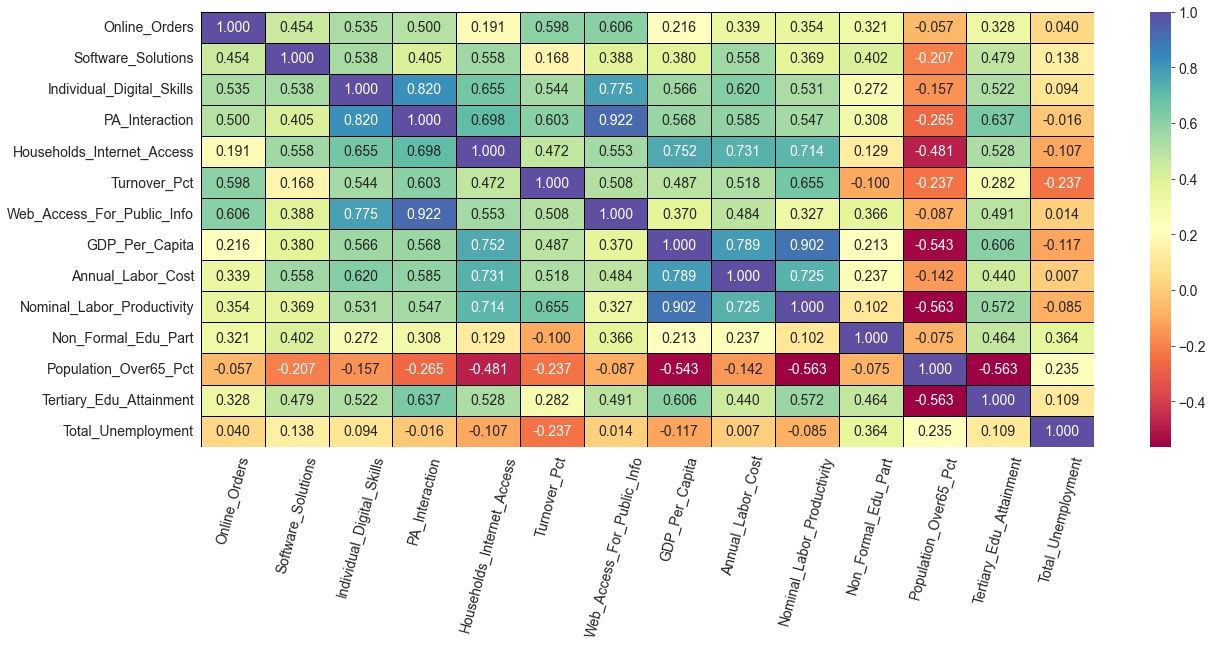

In [36]:
plt.figure(figsize=(20,8))

sns.heatmap(eu.corr(), annot=True, fmt='.3f', cmap='Spectral', linewidths=1, linecolor='black')
plt.xticks(rotation=75);

Using a heatmap for Kendall Tau.

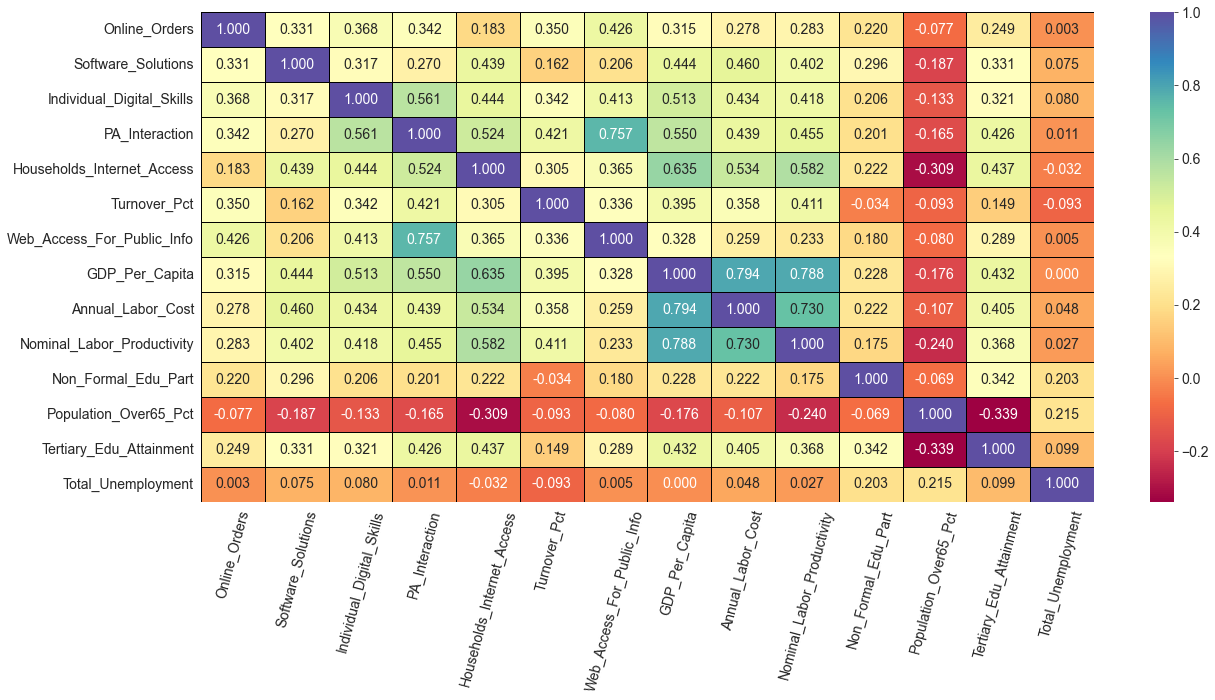

In [5]:
plt.figure(figsize=(20,9))

sns.heatmap(data=ken_corr, annot=True, fmt='.3f', cmap='Spectral', linecolor='black', linewidths=1) 
plt.xticks(rotation=75);

Differences

In [16]:
cor_dif = corrs - ken_corr 
cor_dif

,Online_Orders,Software_Solutions,Individual_Digital_Skills,PA_Interaction,Households_Internet_Access,Turnover_Pct,Web_Access_For_Public_Info,GDP_Per_Capita,Annual_Labor_Cost,Nominal_Labor_Productivity,Non_Formal_Edu_Part,Population_Over65_Pct,Tertiary_Edu_Attainment,Total_Unemployment
Online_Orders,0.000000,0.123314,0.166733,0.158116,0.008246,0.247978,0.179934,-0.098982,0.060661,0.070337,0.100932,0.020409,0.078225,0.037123
Software_Solutions,0.123314,0.000000,0.220527,0.134676,0.119065,0.006266,0.182010,-0.064896,0.098089,-0.033137,0.106190,-0.020084,0.147663,0.063282
Individual_Digital_Skills,0.166733,0.220527,0.000000,0.259319,0.210525,0.202086,0.361802,0.052510,0.185868,0.112518,0.065502,-0.023439,0.200995,0.013806
PA_Interaction,0.158116,0.134676,0.259319,0.000000,0.174100,0.182006,0.165760,0.017696,0.145661,0.091669,0.106824,-0.099943,0.210985,-0.026192
Households_Internet_Access,0.008246,0.119065,0.210525,0.174100,0.000000,0.167498,0.187724,0.117020,0.196463,0.132421,-0.093023,-0.171531,0.091081,-0.074521
Turnover_Pct,0.247978,0.006266,0.202086,0.182006,0.167498,0.000000,0.171127,0.092679,0.160637,0.244008,-0.065296,-0.143792,0.133411,-0.143087
Web_Access_For_Public_Info,0.179934,0.182010,0.361802,0.165760,0.187724,0.171127,0.000000,0.042266,0.224526,0.093781,0.185634,-0.007394,0.202239,0.008440
GDP_Per_Capita,-0.098982,-0.064896,0.052510,0.017696,0.117020,0.092679,0.042266,0.000000,-0.004981,0.113627,-0.014415,-0.366731,0.174551,-0.117181
Annual_Labor_Cost,0.060661,0.098089,0.185868,0.145661,0.196463,0.160637,0.224526,-0.004981,0.000000,-0.004731,0.014849,-0.035735,0.034240,-0.041354
Nominal_Labor_Productivity,0.070337,-0.033137,0.112518,0.091669,0.132421,0.244008,0.093781,0.113627,-0.004731,0.000000,-0.073055,-0.323190,0.204047,-0.112055


## Ranking Countries  

Countries will be ranked on their DESI's performance.

In [27]:
for i in desi_cols:
    eu['{}_rank'.format(i)] = eu[i].rank(method='dense', ascending=False)

eu 

,Countries,Online_Orders,Software_Solutions,Individual_Digital_Skills,PA_Interaction,Households_Internet_Access,Turnover_Pct,Web_Access_For_Public_Info,GDP_Per_Capita,Annual_Labor_Cost,...,Population_Over65_Pct,Tertiary_Edu_Attainment,Total_Unemployment,Online_Orders_rank,Software_Solutions_rank,Individual_Digital_Skills_rank,PA_Interaction_rank,Households_Internet_Access_rank,Turnover_Pct_rank,Web_Access_For_Public_Info_rank
0,European Union,19.0,19.5,53.92,58.50,92.31,19.8,47.39,32430,29.1,...,20.8,41.2,7.0,16.0,13.0,17.0,18.0,13.0,9.0,21.0
1,Belgium,30.6,25.7,54.23,69.62,92.30,28.2,58.55,43330,41.6,...,19.3,50.9,6.3,5.0,6.0,16.0,12.0,14.0,3.0,11.0
2,Bulgaria,10.5,11.2,31.18,26.60,83.53,6.2,19.13,10330,7.0,...,21.7,33.6,5.3,26.0,25.0,27.0,27.0,28.0,25.0,27.0
3,Czechia,24.5,11.5,59.69,68.24,89.31,30.0,57.94,22270,15.3,...,20.2,34.9,2.8,9.0,24.0,12.0,15.0,22.0,2.0,12.0
4,Denmark,38.3,25.8,68.65,92.25,96.14,28.0,90.60,57520,46.9,...,20.1,49.7,5.1,1.0,5.0,4.0,1.0,5.0,4.0,1.0
5,Germany,19.7,20.0,48.92,50.30,91.88,19.1,46.30,43290,37.2,...,22.0,35.7,3.6,14.0,12.0,23.0,22.0,15.0,11.0,22.0
6,Estonia,18.7,14.6,56.37,81.93,91.82,15.5,68.73,23640,14.5,...,20.3,43.2,6.2,17.0,21.0,13.0,6.0,16.0,19.0,6.0
7,Ireland,33.6,19.4,70.49,91.20,97.50,37.9,67.40,84940,33.5,...,14.8,61.7,6.2,3.0,14.0,3.0,2.0,3.0,1.0,8.0
8,Greece,19.3,16.1,52.48,55.00,85.07,5.8,52.27,17010,17.2,...,22.5,44.2,14.7,15.0,18.0,18.0,21.0,27.0,26.0,16.0
9,Spain,25.8,29.4,64.16,68.71,95.92,19.0,56.10,25500,22.9,...,19.8,48.7,14.8,8.0,2.0,6.0,14.0,6.0,12.0,14.0


A possible way to check how much a Country virtuous is can be to sum the values of the '_rank' columns: States with the lowest score will be the better.  

These are the columns to consider:

In [28]:
rank_cols = eu.columns[-7:].to_list()
rank_cols

['Online_Orders_rank',
 'Software_Solutions_rank',
 'Individual_Digital_Skills_rank',
 'PA_Interaction_rank',
 'Households_Internet_Access_rank',
 'Turnover_Pct_rank',
 'Web_Access_For_Public_Info_rank']

In [29]:
eu['Total_DESI_Ranking'] = eu[rank_cols].sum(axis=1)
eu.head()

,Countries,Online_Orders,Software_Solutions,Individual_Digital_Skills,PA_Interaction,Households_Internet_Access,Turnover_Pct,Web_Access_For_Public_Info,GDP_Per_Capita,Annual_Labor_Cost,...,Tertiary_Edu_Attainment,Total_Unemployment,Online_Orders_rank,Software_Solutions_rank,Individual_Digital_Skills_rank,PA_Interaction_rank,Households_Internet_Access_rank,Turnover_Pct_rank,Web_Access_For_Public_Info_rank,Total_DESI_Ranking
0,European Union,19.0,19.5,53.92,58.50,92.31,19.8,47.39,32430,29.1,...,41.2,7.0,16.0,13.0,17.0,18.0,13.0,9.0,21.0,107.0
1,Belgium,30.6,25.7,54.23,69.62,92.30,28.2,58.55,43330,41.6,...,50.9,6.3,5.0,6.0,16.0,12.0,14.0,3.0,11.0,67.0
2,Bulgaria,10.5,11.2,31.18,26.60,83.53,6.2,19.13,10330,7.0,...,33.6,5.3,26.0,25.0,27.0,27.0,28.0,25.0,27.0,185.0
3,Czechia,24.5,11.5,59.69,68.24,89.31,30.0,57.94,22270,15.3,...,34.9,2.8,9.0,24.0,12.0,15.0,22.0,2.0,12.0,96.0
4,Denmark,38.3,25.8,68.65,92.25,96.14,28.0,90.60,57520,46.9,...,49.7,5.1,1.0,5.0,4.0,1.0,5.0,4.0,1.0,21.0


Showing the results:

In [30]:
rank_order = eu[['Countries', 'Total_DESI_Ranking']].sort_values('Total_DESI_Ranking', ascending=False).set_index('Countries').index

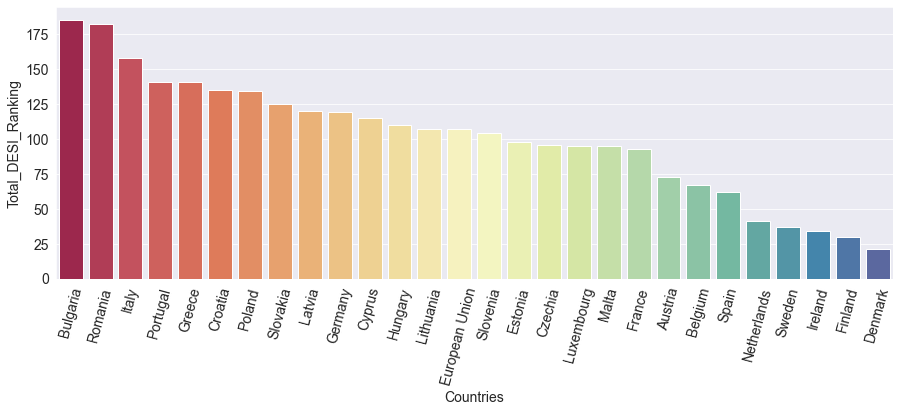

In [31]:
sns.barplot(data=eu, x='Countries', y='Total_DESI_Ranking', order=rank_order, palette=sns.color_palette('Spectral', len(eu)))
plt.xticks(rotation=75);

# Geospatial Analysis  

There are two ways of performing it: GeoPandas or Kepler.

In [3]:
import geopandas as gpd 

In [4]:
world_countries = gpd.read_file('C:/Users/FLAVIO/OneDrive/Desktop/Data_Analysis/world-administrative-boundaries/world-administrative-boundaries.shp')

In [5]:
eu_countries = world_countries[world_countries.name.isin(eu.Countries.to_list())]
eu_countries.shape

(26, 9)

Excluding EU one state is missing.  
Searching for the missing one.

In [6]:
for w in eu.Countries.to_list():
    if w not in eu_countries.name.to_list():
        print(w)

European Union
Czechia


So Czechia, and obviously European Union, are missing, probably Czechia has a different name in the world_countries file.  
To solve this problem the fuzzywuzzy algorithm will be helpful.

In [7]:
import fuzzywuzzy
from fuzzywuzzy import process

In [8]:
process.extract('Czechia', world_countries.name, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

[('China', 67, 239),
 ('Czech Republic', 57, 79),
 ('Chad', 55, 228),
 ('Ethiopia', 53, 158),
 ('Chile', 50, 17),
 ('French Guiana', 50, 150),
 ('Uzbekistan', 47, 27),
 ('Azerbaijan', 47, 118),
 ('Serbia', 46, 101),
 ('Zambia', 46, 168)]

In the world_countries file Czechia has the name of Czech Republic. So, it will inserted into the filtering function.

In [19]:
eu_countries = world_countries[(world_countries.name.isin(eu.Countries.to_list())) |
                (world_countries.name == process.extract('Czechia', world_countries.name, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)[1][0])]
eu_countries.shape

(27, 9)

Now all the EU Countries are included.

The next step is to add the geometry column to the original dataset. 

In [20]:
eu_countries.replace('Czech Republic', 'Czechia', inplace=True)

In [35]:
eu = eu.merge(eu_countries[['name', 'geometry']], left_on='Countries', right_on='name').drop(columns='name')
eu.head(3)

,Countries,Online_Orders,Software_Solutions,Individual_Digital_Skills,PA_Interaction,Households_Internet_Access,Turnover_Pct,Web_Access_For_Public_Info,GDP_Per_Capita,Annual_Labor_Cost,...,Total_Unemployment,Online_Orders_rank,Software_Solutions_rank,Individual_Digital_Skills_rank,PA_Interaction_rank,Households_Internet_Access_rank,Turnover_Pct_rank,Web_Access_For_Public_Info_rank,Total_DESI_Ranking,geometry
0,Belgium,30.6,25.7,54.23,69.62,92.30,28.2,58.55,43330,41.6,...,6.3,5.0,6.0,16.0,12.0,14.0,3.0,11.0,67.0,"POLYGON ((6.01180 50.75727, 6.05472 50.72361, ..."
1,Bulgaria,10.5,11.2,31.18,26.60,83.53,6.2,19.13,10330,7.0,...,5.3,26.0,25.0,27.0,27.0,28.0,25.0,27.0,185.0,"POLYGON ((28.58324 43.74776, 28.57638 43.73305..."
2,Denmark,38.3,25.8,68.65,92.25,96.14,28.0,90.60,57520,46.9,...,5.1,1.0,5.0,4.0,1.0,5.0,4.0,1.0,21.0,"MULTIPOLYGON (((11.51389 54.82972, 11.56444 54..."


The last thing necessary is to add the latitude and the longitude column, which can always be helpful for the analysis.

In [16]:
from geopy.geocoders import Nominatim 

locator = Nominatim(user_agent='kaggle_learn')

In [17]:
def geocoder(row):
    try:
        lat = locator.geocode(row['Countries']).latitude
        long = locator.geocode(row['Countries']).longitude
        return pd.Series({'latitude':lat, 'longitude':long})
    except:
        return None

In [18]:
eu[['Latitude', 'Longitude']] = eu.apply(geocoder, axis=1)
eu.head(1)

,Countries,Online_Orders,Software_Solutions,Individual_Digital_Skills,PA_Interaction,Households_Internet_Access,Turnover_Pct,Web_Access_For_Public_Info,GDP_Per_Capita,Annual_Labor_Cost,Nominal_Labor_Productivity,Non_Formal_Edu_Part,Population_Over65_Pct,Tertiary_Edu_Attainment,Total_Unemployment,geometry,Latitude,Longitude
0,Belgium,30.6,25.7,54.23,69.62,92.3,28.2,58.55,43330,41.6,130.7,4.0,19.3,50.9,6.3,"POLYGON ((6.01180 50.75727, 6.05472 50.72361, ...",50.640281,4.666715


In [19]:
# Saving the file

eu.to_csv('eu_geo.csv', index=None)

Now there are all the columns necessary to create a map.

Example: online orders.

Using Folium

In [2]:
eu_geo = pd.read_csv('./eu_geo.csv')
eu_geo.head()

,Countries,Online_Orders,Software_Solutions,Individual_Digital_Skills,PA_Interaction,Households_Internet_Access,Turnover_Pct,Web_Access_For_Public_Info,GDP_Per_Capita,Annual_Labor_Cost,Nominal_Labor_Productivity,Non_Formal_Edu_Part,Population_Over65_Pct,Tertiary_Edu_Attainment,Total_Unemployment,geometry,Latitude,Longitude
0,Belgium,30.6,25.7,54.23,69.62,92.30,28.2,58.55,43330,41.6,130.7,4.0,19.3,50.9,6.3,"POLYGON ((6.011800000000051 50.75727000000006,...",50.640281,4.666715
1,Bulgaria,10.5,11.2,31.18,26.60,83.53,6.2,19.13,10330,7.0,53.5,2.6,21.7,33.6,5.3,POLYGON ((28.583240000000046 43.74776000000008...,42.607397,25.485662
2,Czechia,24.5,11.5,59.69,68.24,89.31,30.0,57.94,22270,15.3,85.6,3.5,20.2,34.9,2.8,POLYGON ((14.82833000000005 50.865830000000074...,49.743905,15.338106
3,Denmark,38.3,25.8,68.65,92.25,96.14,28.0,90.60,57520,46.9,119.3,23.2,20.1,49.7,5.1,MULTIPOLYGON (((11.51389000000006 54.829720000...,55.670249,10.333328
4,Germany,19.7,20.0,48.92,50.30,91.88,19.1,46.30,43290,37.2,104.0,3.3,22.0,35.7,3.6,MULTIPOLYGON (((14.225550000000055 53.92860000...,51.163818,10.447831


Converting the geometry column from object to geometry.

In [3]:
geometries = gpd.GeoSeries.from_wkt(eu_geo.geometry)
geometries

0     POLYGON ((6.01180 50.75727, 6.05472 50.72361, ...
1     POLYGON ((28.58324 43.74776, 28.57638 43.73305...
2     POLYGON ((14.82833 50.86583, 14.96667 50.85916...
3     MULTIPOLYGON (((11.51389 54.82972, 11.56444 54...
4     MULTIPOLYGON (((14.22555 53.92860, 14.21583 53...
5     MULTIPOLYGON (((22.98485 58.59944, 23.09083 58...
6     MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53...
7     MULTIPOLYGON (((23.84854 35.52298, 23.97139 35...
8     MULTIPOLYGON (((-17.91125 27.77375, -17.96389 ...
9     MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6...
10    MULTIPOLYGON (((17.74555 42.69305, 17.74000 42...
11    MULTIPOLYGON (((15.52889 38.13694, 15.50361 38...
12    POLYGON ((34.12000 35.40083, 33.95805 35.31277...
13    POLYGON ((27.37206 57.53564, 27.42500 57.53194...
14    MULTIPOLYGON (((20.98481 55.27655, 20.94283 55...
15    POLYGON ((6.36217 49.45939, 6.32833 49.46916, ...
16    POLYGON ((22.15144 48.41192, 22.17171 48.40906...
17    POLYGON ((14.56458 35.82353, 14.51972 35.7

In [4]:
import folium 
from folium import Choropleth

In [ ]:
on_ord = folium.Map(location=[50.543264, 14.132349], tiles='cartodbpositron', zoom_start=5)

Choropleth(
    geo_data = gpd.GeoDataFrame(eu_geo, geometry=geometries, crs="EPSG:4326").set_index('Countries')['geometry'],
    data = eu_geo.set_index('Countries')['Online_Orders'],
    key_on="feature.id", 
    fill_color='YlGnBu', 
    legend_name='Online Orders Percentage in Europe, 2021').add_to(on_ord)

on_ord

Using Kepler

In [37]:
eu = pd.read_csv('./eu_geo.csv')

In [38]:
from keplergl import KeplerGl

In [ ]:
choro_map = KeplerGl(height=500)
choro_map.add_data(eu)
choro_map

Compared to Folium, Kepler is easier to handle if different statistics and graphs are needed. 